# Here below we have the data anylsis done for the Kmeans for the web page in Assignment 2.
-------------------------------------------------------------------------


In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
#Create an empty dictionary that can store all the data needed for the visualization.
kmeansdict={"Coordinates":[],"K2labels":[],"K3labels":[],"K4labels":[],"K5labels":[],"K6labels":[],"Mean":[]}

In [3]:
#Load the data as a pandas dataframe
dat = pd.read_csv("SFPD_Incidents_-_from_1_January_2003.csv")

#Discarding bad y data. 90 degrees is an error
dat = dat[dat.Y < 90]

#Only getting prostitution
dat = dat[dat.Category == "PROSTITUTION"]

In [4]:
#Getting the relevant x and y values from the dataframe
data = np.array([list(dat["X"]),list(dat["Y"])]).T # Need to be transposed .T

#Add the coordinates to the dictionary
cordlist=list([list(x) for x in data])
kmeansdict["Coordinates"]=cordlist

#Set range for chich K's to use.
K = range(2,7)

for k in K:
    #Create the K-Means model and fit it
    estimator = KMeans(init='k-means++', n_clusters=k, n_init=10)
    modelKM = estimator.fit(data)
    #Save the labels and the means of the clusters
    kmeansdict["Mean"].append(list([list(x) for x in modelKM.cluster_centers_]))
    kmeansdict["K"+str(k)+"labels"]=list(modelKM.labels_)

In [ ]:
#Save the data as a .json file
#Json not working on some computers but worked for us to save the data.
with open('kmeansdata.json', 'w') as outfile:
    json.dump(kmeansdict, outfile)

---------------------------------------------------------------------------------------------------------------------

# Here below we have the rest of the Kmeans exercise for week 5 if that is needed.
--------------------------------------------------------------------------------



##### Begin by creating a K-means class for K=2,...10 also calculating the Total Squared Error in the same loop

In [5]:
K = range(2,11)

#Creating empty dict and array for model and squared errors
modelKM = {}
sqErr = []

for k in K:
    estimator = KMeans(init='k-means++', n_clusters=k, n_init=10)
    modelKM[k] = estimator.fit(data)
    sqErr.append(modelKM[k].inertia_)

#### Plotting up the squared error to number of clusters

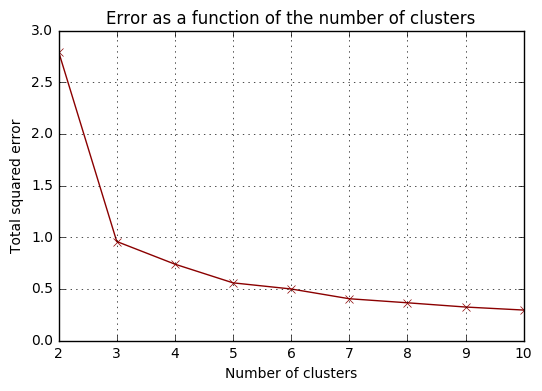

In [6]:
import matplotlib.pyplot as plt
plt.plot(K,sqErr, color='darkred',marker="x") # add a title
plt.title("Error as a function of the number of clusters")
plt.ylabel("Total squared error")
plt.xlabel("Number of clusters")

plt.grid(True)
plt.show()

------------------------------------------------------------------------